<a href="https://colab.research.google.com/github/ekunnii/chatbot_feeder/blob/master/notebooks/Statistics_of_input_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/2020Winter/COMP764-NLU&DL/project/dataset'
import os
os.chdir(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('df_all_context_train_val.csv')

In [4]:
df.head()

,Unnamed: 0,context,response,label
0,119080,__p1__ __SILENCE__ __p2__ you want me to make ...,cape hatteras . that sounds like a fun city !,0
1,98415,"__p1__ __SILENCE__ __p2__ hello , care to chat...",i am good . enjoyed my favorite movie magic mi...,0
2,54721,__p1__ hi how are you doing __p2__ not too bad...,got dumped for being selfish i need to change,0
3,44348,__p1__ hey thow are you today ? like kids __p2...,have you ever ridden a horse ? i'm all about t...,0
4,18073,__p1__ i'm a super hero who runs super long di...,"ah , then not such a super super hero . i live...",0


## Number of Words in Dialog


In [0]:
def get_context_length(context):
    context=re.sub('__p1__|__p2__', '', context)
    tokens = context.rstrip().split()
    return len(tokens)
    
df['context_length'] = df['context'].apply(get_context_length)

In [6]:
df[df.label==0].context_length.mean()

79.74105263157895

In [7]:
df[df.label==1].context_length.mean()

13.404377496671104

In [8]:
df[df.label==0].context_length.median()

77.0

In [9]:
df[df.label==1].context_length.median()

6.0

Text(0.5, 1.0, 'Human-Human Dialog')

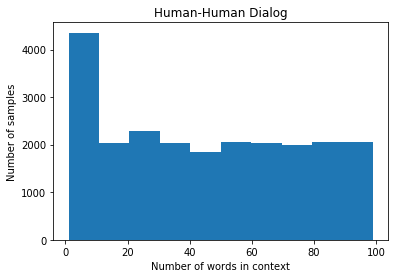

In [10]:
plt.hist(df[(df.label==0) & (df.context_length<100)].context_length)
plt.xlabel('Number of words in context')
plt.ylabel('Number of samples')
plt.title('Human-Human Dialog')

Text(0.5, 1.0, 'Feedback Dialog')

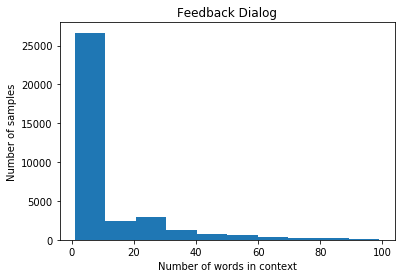

In [11]:
plt.hist(df[(df.label==1) & (df.context_length<100)].context_length)
plt.xlabel('Number of words in context')
plt.ylabel('Number of samples')
plt.title('Feedback Dialog')

## Number of Turns

In [0]:
def split_turns(context):
    turn_list = [x.strip() for x in re.split('__p1__|__p2__',context)]
    turn_list.pop(0) # remove first empty string

    return turn_list
df['turn_list'] = df['context'].apply(split_turns)
df['Number of Turns'] = df['turn_list'].str.len()

In [13]:
df.head(10)

,Unnamed: 0,context,response,label,context_length,turn_list,Number of Turns
0,119080,__p1__ __SILENCE__ __p2__ you want me to make ...,cape hatteras . that sounds like a fun city !,0,26,"[__SILENCE__, you want me to make you tuna sal...",3
1,98415,"__p1__ __SILENCE__ __p2__ hello , care to chat...",i am good . enjoyed my favorite movie magic mi...,0,19,"[__SILENCE__, hello , care to chat with a fema...",3
2,54721,__p1__ hi how are you doing __p2__ not too bad...,got dumped for being selfish i need to change,0,20,"[hi how are you doing, not too bad a little do...",3
3,44348,__p1__ hey thow are you today ? like kids __p2...,have you ever ridden a horse ? i'm all about t...,0,138,"[hey thow are you today ? like kids, i'm good ...",13
4,18073,__p1__ i'm a super hero who runs super long di...,"ah , then not such a super super hero . i live...",0,42,[i'm a super hero who runs super long distance...,3
5,47020,__p1__ did you hear that troy gentry was kille...,i love cheesecake,0,157,[did you hear that troy gentry was killed toda...,15
6,5476,"__p1__ hi there , i know we have never talked ...",i like to go rick climbing,0,151,"[hi there , i know we have never talked much b...",13
7,56124,__p1__ i am an old man and i love to garden .,"hello , i love gardening as well , do you have...",0,11,[i am an old man and i love to garden .],1
8,62829,__p1__ hello there ! how are you ? __p2__ i'm ...,my dog used to love treats especially cheese .,0,195,"[hello there ! how are you ?, i'm great ! how ...",15
9,38307,__p1__ do you believe in astrology? __p2__ i w...,no i think it's a lie,1,23,"[do you believe in astrology?, i wish i had se...",3


Text(0.5, 1.0, 'Human-Human Dialog')

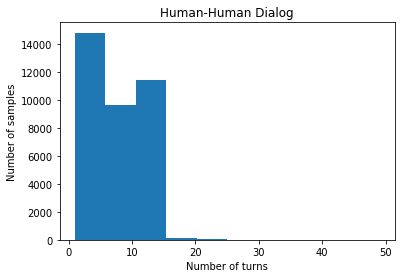

In [14]:
plt.hist(df[(df.label==0)]['Number of Turns'])
plt.xlabel('Number of turns')
plt.ylabel('Number of samples')
plt.title('Human-Human Dialog')

Text(0.5, 1.0, 'Human-Human Dialog')

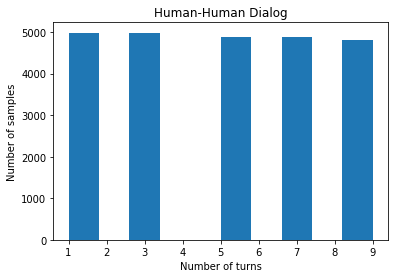

In [15]:
plt.hist(df[(df.label==0)&(df['Number of Turns']<=10)]['Number of Turns'])
plt.xlabel('Number of turns')
plt.ylabel('Number of samples')
plt.title('Human-Human Dialog')

Text(0.5, 1.0, 'Feedback Dialog')

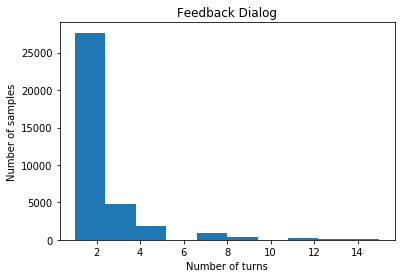

In [16]:
plt.hist(df[(df.label==1)]['Number of Turns'])
plt.xlabel('Number of turns')
plt.ylabel('Number of samples')
plt.title('Feedback Dialog')

## Number of words per turn

In [0]:
df_human = df[(df.label==0)]

In [0]:
# human_lengths = [len(x.split()) for item in df_human['context'].str.split('__p1__') for x in item if(len(x.split())>0)]

human_lengths = [len(x.split()) for turns in df_human['turn_list'] for x in turns if(len(x.split())>0)]

Text(0.5, 1.0, 'Human Dialog')

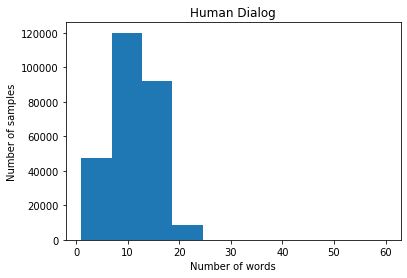

In [19]:
plt.hist(human_lengths)
plt.xlabel('Number of words')
plt.ylabel('Number of samples')
plt.title('Human Dialog')

In [20]:
np.mean(human_lengths)

10.71652681503101

In [21]:
np.median(human_lengths)

11.0

In [0]:
df_feedback = df[(df.label==1)]

In [0]:
# feedback_lengths = [len(x.split()) for item in df_feedback['context'].str.split('__p1__') for x in item if(len(x.split())>0)]
feedback_lengths = [len(x.split()) for turns in df_feedback['turn_list'] for x in turns if(len(x.split())>0)]

Text(0.5, 1.0, 'Feedback Dialog')

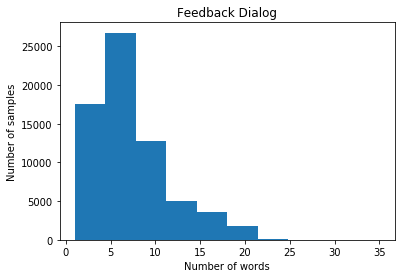

In [24]:
plt.hist(feedback_lengths)
plt.xlabel('Number of words')
plt.ylabel('Number of samples')
plt.title('Feedback Dialog')

In [25]:
np.mean(feedback_lengths)

7.161079494931531

In [26]:
np.median(feedback_lengths)

6.0